# **Amazon Top 50 Bestselling Books 2009-2019**# 

![Amazon Top 50 Bestselling Books 2009-2019](http://thefutureofink.com/wp-content/uploads/2013/12/AmazonEbooks.png)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


# Importing Data from the Amazon Top 50 Bestselling Books 2009-2019 dataset.# 

In [2]:
book = pd.read_csv('../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv')
book.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


# Checking the data.# 

In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


**Checking missing values in the data.**

In [4]:
book.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

**Checking duplicate values in the data.**

In [5]:
book['Name'].value_counts()

Publication Manual of the American Psychological Association, 6th Edition                       10
StrengthsFinder 2.0                                                                              9
Oh, the Places You'll Go!                                                                        8
The Very Hungry Caterpillar                                                                      7
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change                     7
                                                                                                ..
Crazy Rich Asians (Crazy Rich Asians Trilogy)                                                    1
Allegiant                                                                                        1
The Constitution of the United States                                                            1
Go the F**k to Sleep                                                                             1
Grain Brai

**Removing duplicate values from the data.**

In [6]:
book.drop_duplicates('Name', keep = 'last', inplace = True)
book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         351 non-null    object 
 1   Author       351 non-null    object 
 2   User Rating  351 non-null    float64
 3   Reviews      351 non-null    int64  
 4   Price        351 non-null    int64  
 5   Year         351 non-null    int64  
 6   Genre        351 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 21.9+ KB


# **Performing EDA on the data.**# 

<AxesSubplot:xlabel='Year'>

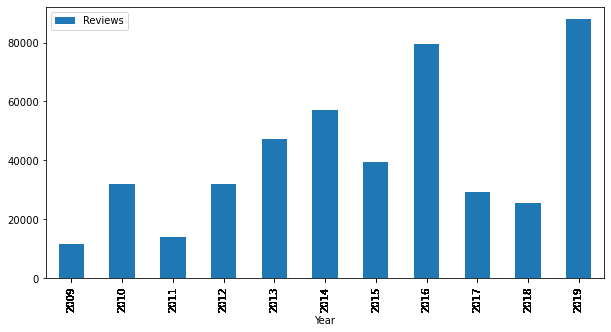

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))
book.plot(kind = 'bar', x = 'Year', y = 'Reviews', ax = ax)

<AxesSubplot:xlabel='Year', ylabel='Reviews'>

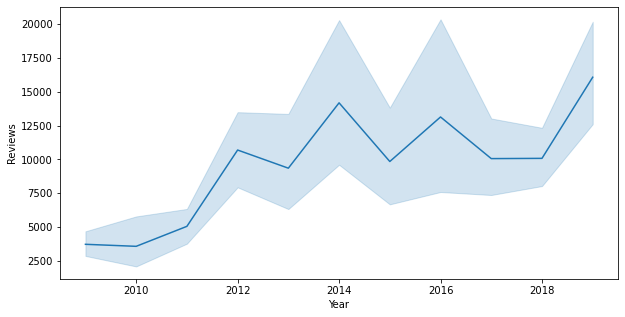

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(y='Reviews', x='Year', data=book, ax=ax)

<AxesSubplot:xlabel='User Rating', ylabel='Price'>

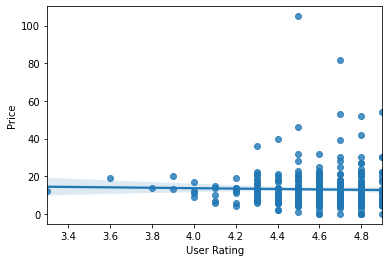

In [9]:
sns.regplot(x=book['User Rating'], y=book['Price'])

<AxesSubplot:xlabel='User Rating', ylabel='Count'>

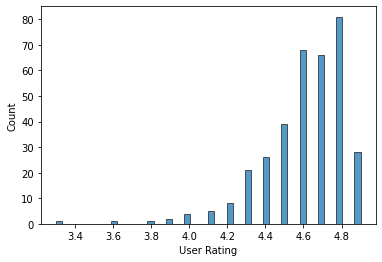

In [10]:
sns.histplot(x=book['User Rating'], kde=False, bins=50)

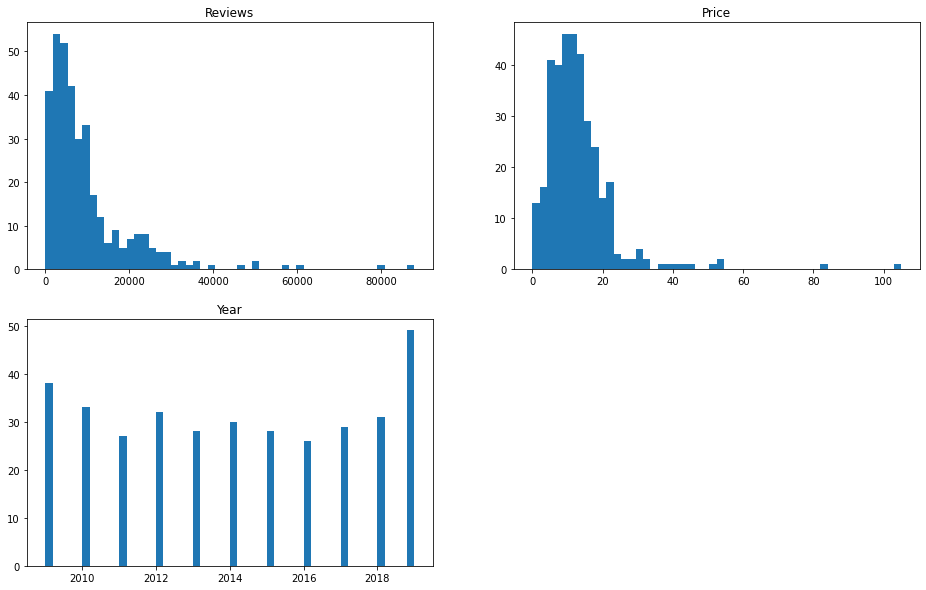

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(16,10))
fig.delaxes(axs[1,1])

axs[0,0].hist(book['Reviews'], bins=50)
axs[0,1].hist(book['Price'], bins=50)
axs[1,0].hist(book['Year'], bins=50)
axs[0,0].title.set_text('Reviews')
axs[0,1].title.set_text('Price')
axs[1,0].title.set_text('Year')

plt.show()

<AxesSubplot:xlabel='Genre'>

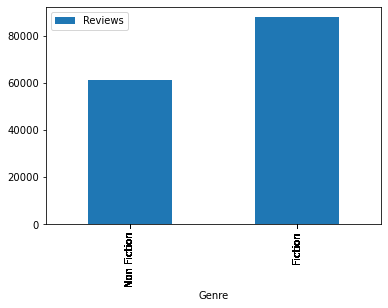

In [12]:
book.plot(x='Genre', y='Reviews', kind='bar')

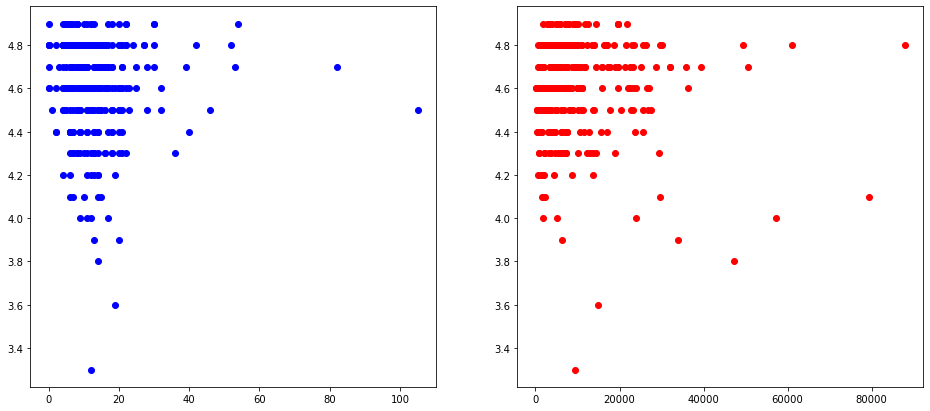

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
ax[0].scatter('Price', 'User Rating', data=book, color='b')
ax[1].scatter('Reviews', 'User Rating', data=book, color='r')
plt.show()

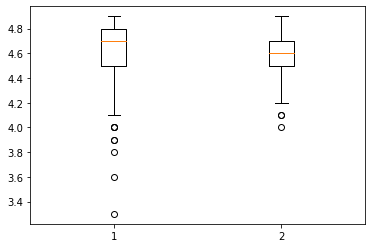

In [14]:
Fiction = book['Genre']=='Fiction'
Non_Fiction = book['Genre']=='Non Fiction'
plt.boxplot([book[Fiction]['User Rating'], book[Non_Fiction]['User Rating']])
plt.show()

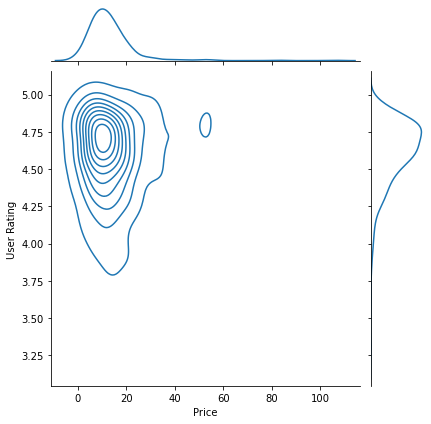

In [15]:
sns.jointplot(x=book['Price'], y=book['User Rating'], kind="kde")

***Creating new dataframe by copying the existing one so we can use it later without errors.***

In [16]:
book_for_tree = book.copy(deep=True)
book_for_tree

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


***Generate Dummies***

In [17]:
book=pd.get_dummies(book, drop_first=True, columns=['Year', 'Genre'])
book.head()

,Name,Author,User Rating,Reviews,Price,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Genre_Non Fiction
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,0,0,0,0,0,0,1,0,0,0,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,0,1,0,0,0,0,0,0,0,0,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,0,0,0,0,0,0,0,0,1,0,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,0,0,0,0,0,0,0,1,0,0,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,0,0,0,0,0,0,0,0,0,1,1


***Plotting Correlation***

In [18]:
book.corr()

,User Rating,Reviews,Price,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Genre_Non Fiction
User Rating,1.000000,-0.056105,-0.025012,-0.094896,-0.115520,-0.087074,-0.090814,-0.043818,0.039234,0.094322,0.006199,0.009640,0.245212,-0.026311
Reviews,-0.056105,1.000000,-0.040079,-0.184054,-0.125710,0.026473,-0.011722,0.123683,0.001643,0.087222,0.007584,0.008385,0.233142,-0.280202
Price,-0.025012,-0.040079,1.000000,-0.036900,0.034367,0.063505,-0.034522,0.127513,-0.100747,0.073025,-0.022588,-0.056030,-0.119752,0.078967
Year_2010,-0.094896,-0.184054,-0.036900,1.000000,-0.092994,-0.102029,-0.094846,-0.098481,-0.094846,-0.091115,-0.096675,-0.100265,-0.129759,0.020438
Year_2011,-0.115520,-0.125710,0.034367,-0.092994,1.000000,-0.091430,-0.084994,-0.088251,-0.084994,-0.081650,-0.086632,-0.089849,-0.116280,-0.057796
Year_2012,-0.087074,0.026473,0.063505,-0.102029,-0.091430,1.000000,-0.093252,-0.096825,-0.093252,-0.089583,-0.095050,-0.098579,-0.127578,0.011663
Year_2013,-0.090814,-0.011722,-0.034522,-0.094846,-0.084994,-0.093252,1.000000,-0.090009,-0.086687,-0.083277,-0.088359,-0.091640,-0.118597,-0.004993
Year_2014,-0.043818,0.123683,0.127513,-0.098481,-0.088251,-0.096825,-0.090009,1.000000,-0.090009,-0.086468,-0.091744,-0.095151,-0.123141,-0.129409
Year_2015,0.039234,0.001643,-0.100747,-0.094846,-0.084994,-0.093252,-0.086687,-0.090009,1.000000,-0.083277,-0.088359,-0.091640,-0.118597,0.079460
Year_2016,0.094322,0.087222,0.073025,-0.091115,-0.081650,-0.089583,-0.083277,-0.086468,-0.083277,1.000000,-0.084882,-0.088034,-0.113930,0.062292


<AxesSubplot:>

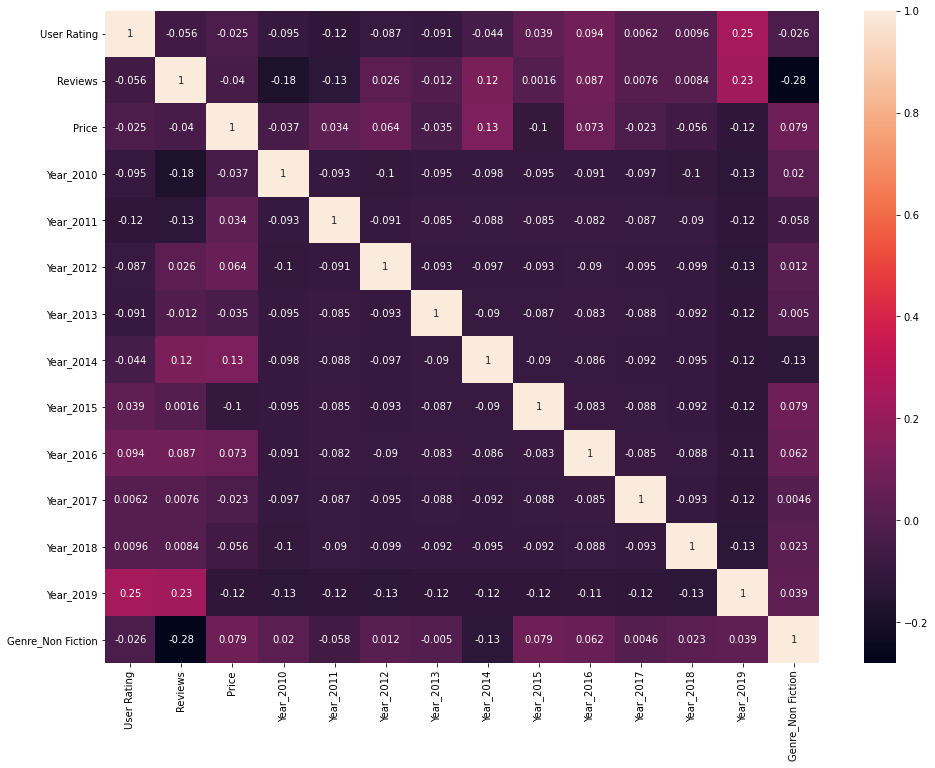

In [19]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(book.corr(),annot=True,ax=ax)

In [20]:
book.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Genre_Non Fiction'],
      dtype='object')

# **Remove Outliers**# 

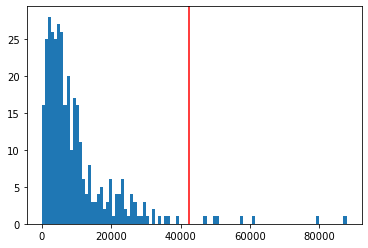

In [21]:
plt.hist(book['Reviews'], bins=100)
outlier_limit = (book['Reviews'].mean() + 3*book['Reviews'].std())
plt.axvline(x=outlier_limit, color='r')
plt.show()

In [22]:
book = book[book['Reviews'] <= outlier_limit]

# **Linear Regression**# 

In [23]:
z = ['Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Year_2019',
       'Genre_Non Fiction']
t = ['Reviews', 'Price', 'Year_2010']
y = book['User Rating'].values.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
for v in z:
    t.append(v)
    X = book[t]
    reg = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_pred_train = reg.predict(X_train)
    R_squared = reg.score(X_test, y_test)
    print(R_squared)

-0.023312790250984206
0.013595745056832031
0.015512820666101934
0.027801480742753126
0.019785692421840584
0.01727007166602812
0.01044069034073325
0.01440624291021031
-0.07301565138570565
-0.022537005357379902
0.005765687404769793


# **Decision Tree: To predict Genre**# 

In [25]:
X1 = np.array(book_for_tree[['Reviews', 'Price', 'Year', 'User Rating']])
y1 = np.array(book_for_tree[['Genre']])
from sklearn import tree

tree = tree.DecisionTreeClassifier(max_depth=4)
tree = tree.fit(X1, y1)

In [26]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state = 1) 

In [27]:
tree.score(X1, y1)

0.7464387464387464

In [28]:
y1_pred = tree.predict(X1_test)
y1_pred

array(['Non Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Non Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Non Fiction', 'Fiction', 'Non Fiction', 'Non Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Non Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Fiction', 'Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Non Fiction', 'Non Fiction', 'Non Fiction', 'Non Fiction',
       'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction', 'Non Fiction',
       'Fiction', 'Fiction', 'Non Fiction', 'Non Fiction', 'Fiction',
       'Fiction', 'Non F

***More EDA***

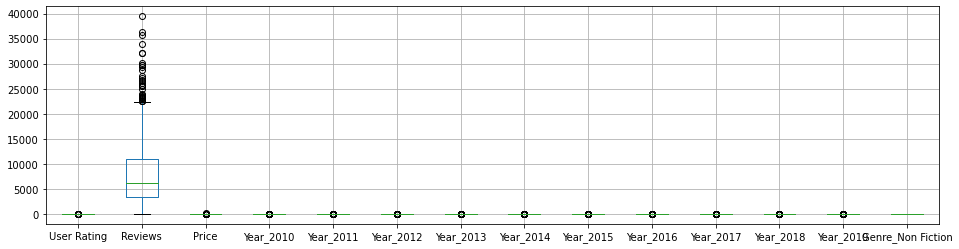

In [29]:
plt.figure(figsize=(16,4))
book.boxplot()
plt.show()

In [30]:
book.describe()

,User Rating,Reviews,Price,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Genre_Non Fiction
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,4.612791,8727.799419,13.026163,0.095930,0.078488,0.093023,0.078488,0.081395,0.081395,0.069767,0.084302,0.090116,0.136628,0.552326
std,0.219884,7739.906658,10.109714,0.294925,0.269330,0.290888,0.269330,0.273840,0.273840,0.255126,0.278245,0.286765,0.343954,0.497979
min,3.300000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,3335.500000,7.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.600000,6169.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.800000,10953.750000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.900000,39459.000000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
